# Convolutional Neural Network

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('PlantVillage/Training',
                                                 target_size = (227, 227),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1978 images belonging to 2 classes.


### Preprocessing the Test set

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('PlantVillage/Testing',
                                            target_size = (227, 227),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 496 images belonging to 2 classes.


In [2]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
model = model.fit(x = training_set, validation_data = test_set, epochs = 16)

Epoch 1/16
62/62 [==============================] - 282s 5s/step - loss: 14.7460 - accuracy: 0.6630 - val_loss: 39.1198 - val_accuracy: 0.5968
Epoch 2/16
62/62 [==============================] - 284s 5s/step - loss: 0.5235 - accuracy: 0.8878 - val_loss: 3.1646 - val_accuracy: 0.6835
Epoch 3/16
62/62 [==============================] - 290s 5s/step - loss: 0.3237 - accuracy: 0.9152 - val_loss: 4.2302 - val_accuracy: 0.6371
Epoch 4/16
62/62 [==============================] - 284s 5s/step - loss: 0.2999 - accuracy: 0.9181 - val_loss: 0.3954 - val_accuracy: 0.8770
Epoch 5/16
62/62 [==============================] - 291s 5s/step - loss: 0.2571 - accuracy: 0.9115 - val_loss: 0.3913 - val_accuracy: 0.9073
Epoch 6/16
62/62 [==============================] - 293s 5s/step - loss: 0.1934 - accuracy: 0.9482 - val_loss: 0.0916 - val_accuracy: 0.9698
Epoch 7/16
62/62 [==============================] - 295s 5s/step - loss: 0.1500 - accuracy: 0.9516 - val_loss: 0.5010 - val_accuracy: 0.9093
Epoch 8/16


## We are doing the below plotting steps manually because we was unable to get history from our model after training.It can be fixed but shortage of time for submission 

In [26]:
loss = [14.746,0.5235,0.3237,0.2999,0.2571,0.1934,0.1500,0.2037,0.0815,0.1405,0.0813,0.0975,.0688,0.1331,0.2081,0.1219]
accuracy = [0.663,0.89,0.92,0.924,0.9115,0.9482,0.9516,0.9361,0.9736,0.9549,0.9764,0.9734,0.9821,0.9787,0.9677,0.9592]
val_accuracy = [0.5968,0.6835,0.6371,0.8770,0.9073,0.9698,0.9093,0.7056,0.9012,0.9093,0.9335,0.9899,0.7177,0.9234,0.7278,0.8548]
val_loss = [39.1198,3.16465,4.2302,0.3954,0.3913,0.0916,0.5010,0.8358,0.9444,1.1588,0.3902,0.1225,2.9137,0.3256,9.5541,2.9940]
epocs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [21]:
from matplotlib import pyplot as plt

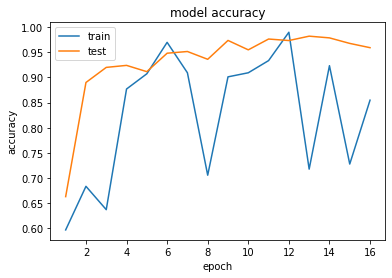

In [24]:
# summarize history for accuracy
plt.plot(epocs,val_accuracy)
plt.plot(epocs,accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

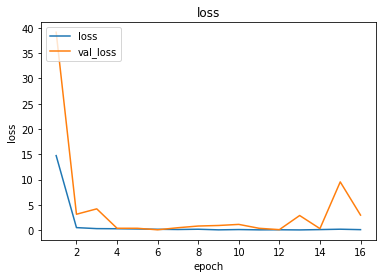

In [25]:
plt.plot(epocs,loss)
plt.plot(epocs,val_loss)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()